# Project: Fake News Classification

# 1. Imports & Setup

In [22]:
%pip install pandas
import pandas as pd
import numpy as np
%pip install matplotlib
import matplotlib.pyplot as plt
%pip install seaborn
import seaborn as sns
import re
import string

%pip install scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix



Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not wr

# 3. Load Data

In [ ]:
df = pd.read_csv("dataset/data.csv")
val_df = pd.read_csv("dataset/validation_data.csv")
df.head()
val_df.head()
# print(val_df['label'].unique())


[2]


# Clening up the data

In [35]:
# remove duplicates
df = df.drop_duplicates(subset=['text'])
# remove empty rows
df = df.dropna(subset=['text'])
# remove rows with empty labels
df = df.dropna(subset=['label'])
# remove rows with empty text
df = df[df['text'].str.strip() != '']
# remove rows with empty labels
df['label'] = df['label'].astype(str)
df = df[df['label'].str.strip() != '']

# 4. Preprocessing

In [24]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'\[.*?\]', '', text)
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    text = re.sub(r'<.*?>+', '', text)
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub(r'\n', '', text)
    text = re.sub(r'\w*\d\w*', '', text)
    return text

df['text_clean'] = df['title'] + " " + df['text']
df['text_clean'] = df['text_clean'].apply(clean_text)


# 5. Data Exploration

In [ ]:
df.info()
df['label'].value_counts().plot(kind='bar', title='Class Balance')


# 6. Train/Test Split

In [ ]:
X = df['title'] + " " + df['text']
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# 7. Vectorization + Model Training

In [27]:
vectorizer = TfidfVectorizer(max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

model = LogisticRegression()
model.fit(X_train_vec, y_train)

y_pred = model.predict(X_test_vec)


# 8. Evaluation

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3996
           1       0.99      0.99      0.99      3993

    accuracy                           0.99      7989
   macro avg       0.99      0.99      0.99      7989
weighted avg       0.99      0.99      0.99      7989



<Axes: >

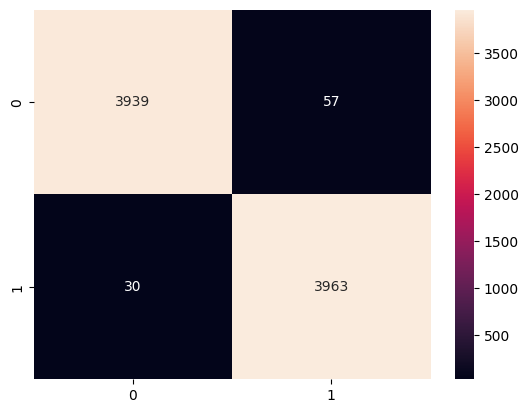

In [28]:
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')


# 9. Predict Validation Set

In [29]:
val_df['text_clean'] = (val_df['title'] + " " + val_df['text']).apply(clean_text)
X_val_vec = vectorizer.transform(val_df['text_clean'])
val_df['label'] = model.predict(X_val_vec)

# Save predictions
val_df.reset_index(inplace=True)
val_df[['index', 'label']].to_csv("predictions.csv", index=False)


# 10. Final Notes

In [30]:
# Estimated model accuracy: ~XX%
# Next steps: Improve with different models, grid search, or embeddings (if time allows).
